<a href="https://colab.research.google.com/github/shahista037/RD-INFRO-TECHNOLOGY/blob/main/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
    Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Missing Values:
 Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


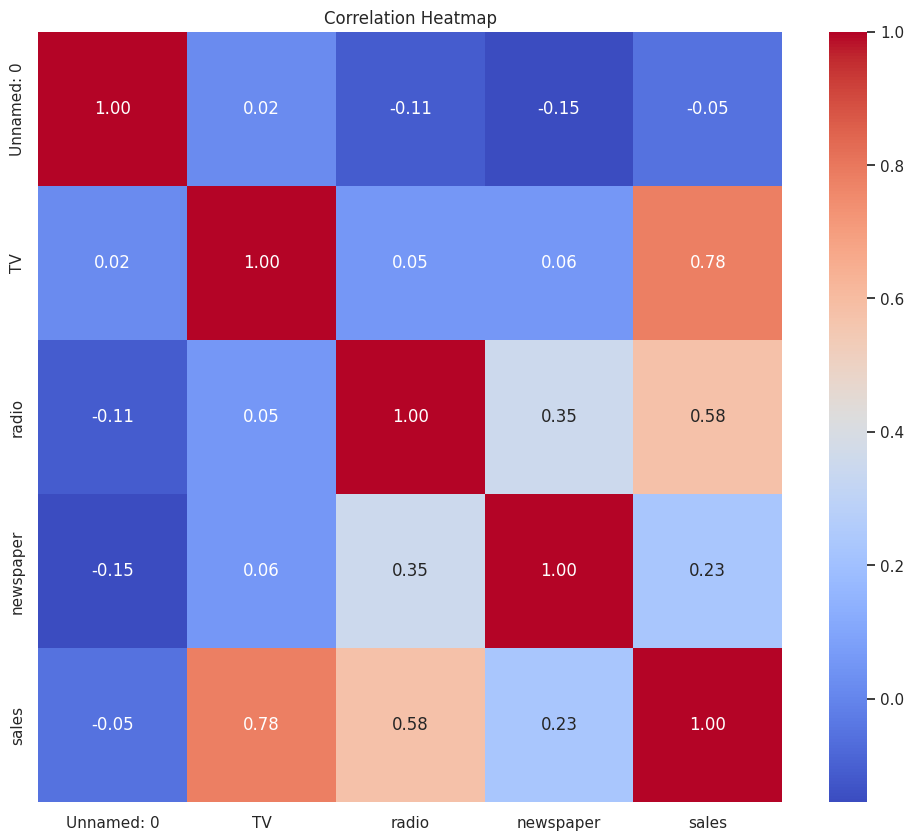


Prediction Results:
     Actual sales  Predicted sales
0           16.9        16.412277
1           22.4        20.843193
2           21.4        21.511869
3            7.3        10.653100
4           24.7        22.124058
5           12.6        13.123835
6           22.3        21.037489
7            8.4         7.503854
8           11.5        13.647870
9           14.9        15.120409
10           9.5         9.020556
11           8.7         6.706666
12          11.9        14.401551
13           5.3         8.886090
14          10.3         9.743533
15          11.7        12.215520
16           5.5         8.713709
17          16.6        16.294145
18          11.3        10.268023
19          18.9        18.804982
20          19.7        19.588647
21          12.5        13.223183
22          10.9        12.364787
23          22.2        21.314736
24           9.3         7.797347
25           8.1         5.781900
26          21.7        20.749348
27          13.4        11

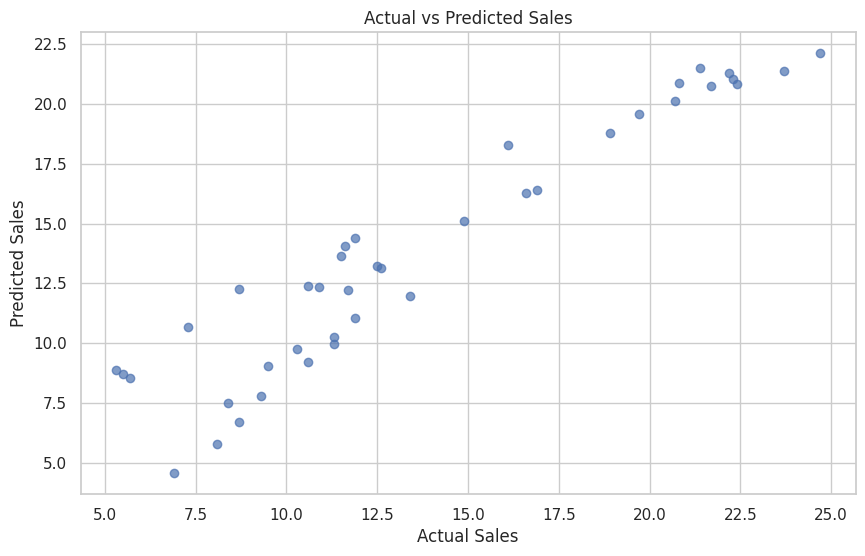

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Display the first few rows
print("Dataset Head:\n", data.head())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Visualize correlations using Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Prepare features and target variable
x = np.array(data.drop(["sales"], axis=1))  # Exclude the target column
y = np.array(data["sales"])

# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(xtrain, ytrain)

# Make predictions
ypred = model.predict(xtest)

# Create a DataFrame for comparison
results = pd.DataFrame({
    "Actual sales": ytest,
    "Predicted sales": ypred.flatten()
})

# Display the first few rows of the results
print("\nPrediction Results:\n", results.head(40))

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()